<a href="https://colab.research.google.com/github/hsantos1985/Linear_regression_models/blob/main/ANALISE_PISA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados do PISA

O Programme for International Student Assessment (PISA) é um teste feito no mundo todo a cada 3 anos para estudantes de 15 anos para avaliar a performance em matemática, leitura e ciências. A ideia do teste é fornecer uma maneira de comparar estudantes de diferentes partes do mundo. O objetivo dessa questão é prever as notas de leitura dos estudantes dos Estados Unidos para o PISA de 2009.

O dataset [pisa2009train.csv](https://raw.githubusercontent.com/abnr/ml-data/main/pisa2009train.csv) e [pisa2009test.csv](https://raw.githubusercontent.com/abnr/ml-data/main/pisa2009test.csv) contem informação sobre demografia e escolas dos estudantes norte-americanos que fazem os exame, extraidos do dataset 2009 Pisa Public-Use Data Files distribuido pela United States National Center for Education Statistics (NCES). Esse dataset não possui informações que tornem possível a identificação dos estudantes.
 
Cada linha do dataset pisa2009train.csv e pisa2009test.csv representa um estudante que fez a prova. Os datasets possuem as seguintes variáveis:

* grade: A série do aluno na escola (a maior parte dos alunos está na 10ª) 

* male: Se o estudante é do sexo masculino (1/0)

* raceeth: A raça/etnia do estudante.

* preschool: Se o estudante cursou a pré-escola (1/0)

* expectBachelors: Se o estudante espera fazer graduação superior (1/0)

* motherHS: Se a mãe do estudante completou o ensino médio (1/0) 

* motherBachelors: Se a mãe do estudante completou a graduação superior (1/0)

* motherWork: Se a mãe do estudante possui um emprego  (1/0)

* fatherHS: Se o pai do estudante completou o ensino médio  (1/0)

* fatherBachelors: Se o pai do estudante obteve graduação superior (1/0)

* fatherWork: Se o pai do estudante possui um emprego (1/0)

* selfBornUS: Se o estudante nasceu nos Estados Unidos (1/0)

* motherBornUS: Se a mãe do estudante nasceu nos Estados Unidos (1/0)

* fatherBornUS: Se o pai do estudante nasceu nos Estados Unidos (1/0)

* englishAtHome: Se o estudante fala inglês em casa (1/0)

* computerForSchoolwork: Se o estudante tem acesso a um computador para tarefas da escola (1/0)

* read30MinsADay: Se o estudante lê por prazer 30 minutos/dia (1/0)

* minutesPerWeekEnglish: Número de minutos que o estudante passa por semana em aulas de inglês

* studentsInEnglish: Número de estudantes na sala de inglês da escola. 

* schoolHasLibrary: Se a escola do estudante possui uma biblioteca.  (1/0)

* publicSchool: Se o estudante estuda em uma escola pública  (1/0)

* urban: Se o estudante estuda em uma escola em uma área urbana  (1/0)

* schoolSize: O número de estudante na escola 

* readingScore: A nota do estudante em leitura em uma escala de 1000 pontos. 

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from scipy import stats
from scipy.stats.stats import pearsonr
import scipy
from sklearn.metrics import r2_score, mean_squared_error


import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_teste=pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/pisa2009train.csv')

In [3]:
df_treino=pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/pisa2009test.csv')

#Inspeção dos dados

In [4]:
df_treino.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


In [5]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   male                   1570 non-null   int64  
 2   raceeth                1557 non-null   object 
 3   preschool              1549 non-null   float64
 4   expectBachelors        1547 non-null   float64
 5   motherHS               1525 non-null   float64
 6   motherBachelors        1382 non-null   float64
 7   motherWork             1534 non-null   float64
 8   fatherHS               1445 non-null   float64
 9   fatherBachelors        1282 non-null   float64
 10  fatherWork             1457 non-null   float64
 11  selfBornUS             1546 non-null   float64
 12  motherBornUS           1547 non-null   float64
 13  fatherBornUS           1512 non-null   float64
 14  englishAtHome          1543 non-null   float64
 15  comp

In [6]:
#Analise descritiva do df
df_treino.describe().T

,count,mean,std,min,25%,50%,75%,max
grade,1570.0,10.094268,0.548507,9.00,10.00,10.000,10.0000,12.00
male,1570.0,0.519108,0.499794,0.00,0.00,1.000,1.0000,1.00
preschool,1549.0,0.710781,0.453546,0.00,0.00,1.000,1.0000,1.00
expectBachelors,1547.0,0.767292,0.422695,0.00,1.00,1.000,1.0000,1.00
motherHS,1525.0,0.868197,0.338388,0.00,1.00,1.000,1.0000,1.00
motherBachelors,1382.0,0.330680,0.470628,0.00,0.00,0.000,1.0000,1.00
motherWork,1534.0,0.719035,0.449617,0.00,0.00,1.000,1.0000,1.00
fatherHS,1445.0,0.848443,0.358715,0.00,1.00,1.000,1.0000,1.00
fatherBachelors,1282.0,0.325273,0.468660,0.00,0.00,0.000,1.0000,1.00
fatherWork,1457.0,0.843514,0.363440,0.00,1.00,1.000,1.0000,1.00


In [7]:
#checando duplicidades das linhas
df_treino.duplicated().sum()

0

In [8]:
#checando a duplicdade das colunas
df_treino.T.duplicated().sum()

0

In [9]:
#Verificando as colunas com mais valores e branco nas variáveis de treino
df_treino.isnull().sum().sort_values(ascending=False)

fatherBachelors          288
motherBachelors          188
fatherHS                 125
studentsInEnglish        114
fatherWork               113
minutesPerWeekEnglish    103
schoolSize                69
fatherBornUS              58
schoolHasLibrary          58
motherHS                  45
motherWork                36
computerForSchoolwork     30
englishAtHome             27
selfBornUS                24
expectBachelors           23
motherBornUS              23
read30MinsADay            21
preschool                 21
raceeth                   13
urban                      0
grade                      0
publicSchool               0
male                       0
readingScore               0
dtype: int64

# EDA (Análise Exploratória de Dados)

In [10]:
#Verificando as médias da nota dos estudante por gênero
table = pd.pivot_table(df_treino,index=['male'],values=['readingScore'], aggfunc=np.mean)
table

,readingScore
male,
0,509.299205
1,485.310319


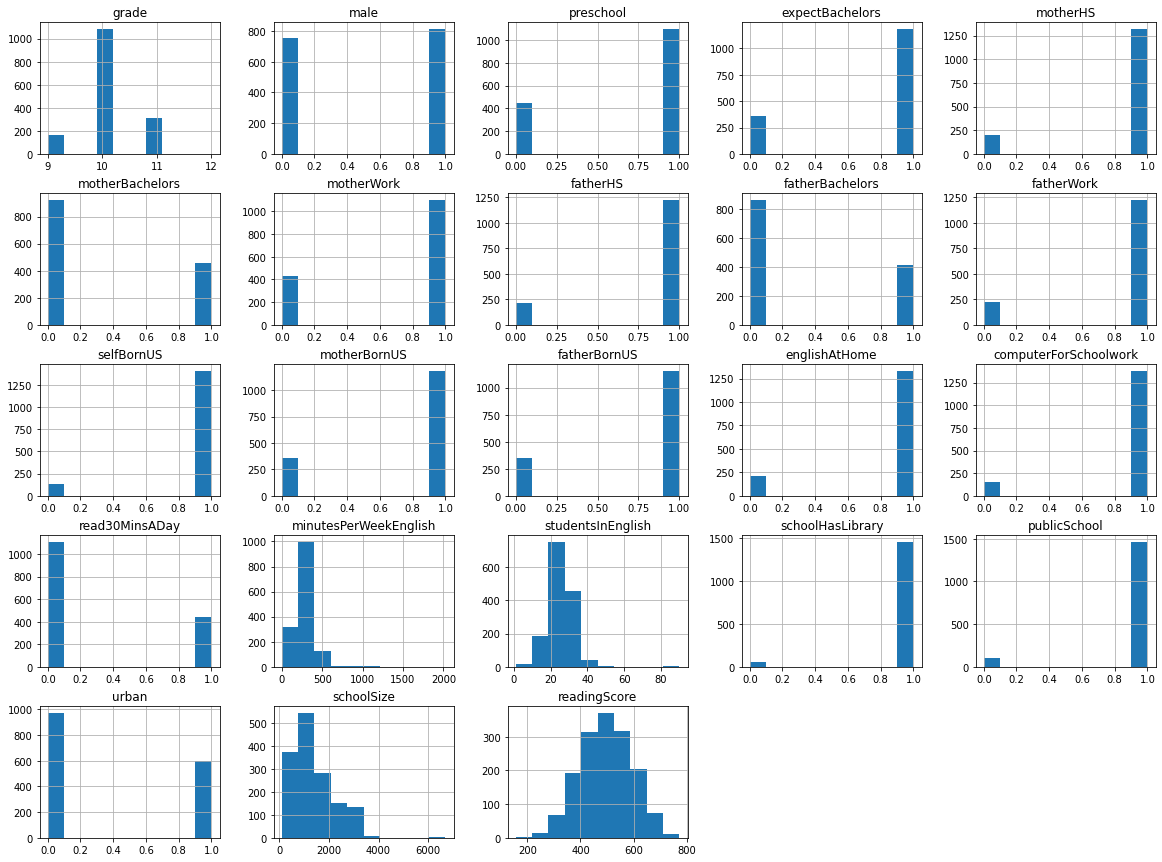

In [11]:
#analisando o histograma das variáveis
df_treino.hist(figsize=(20,15))
plt.show();

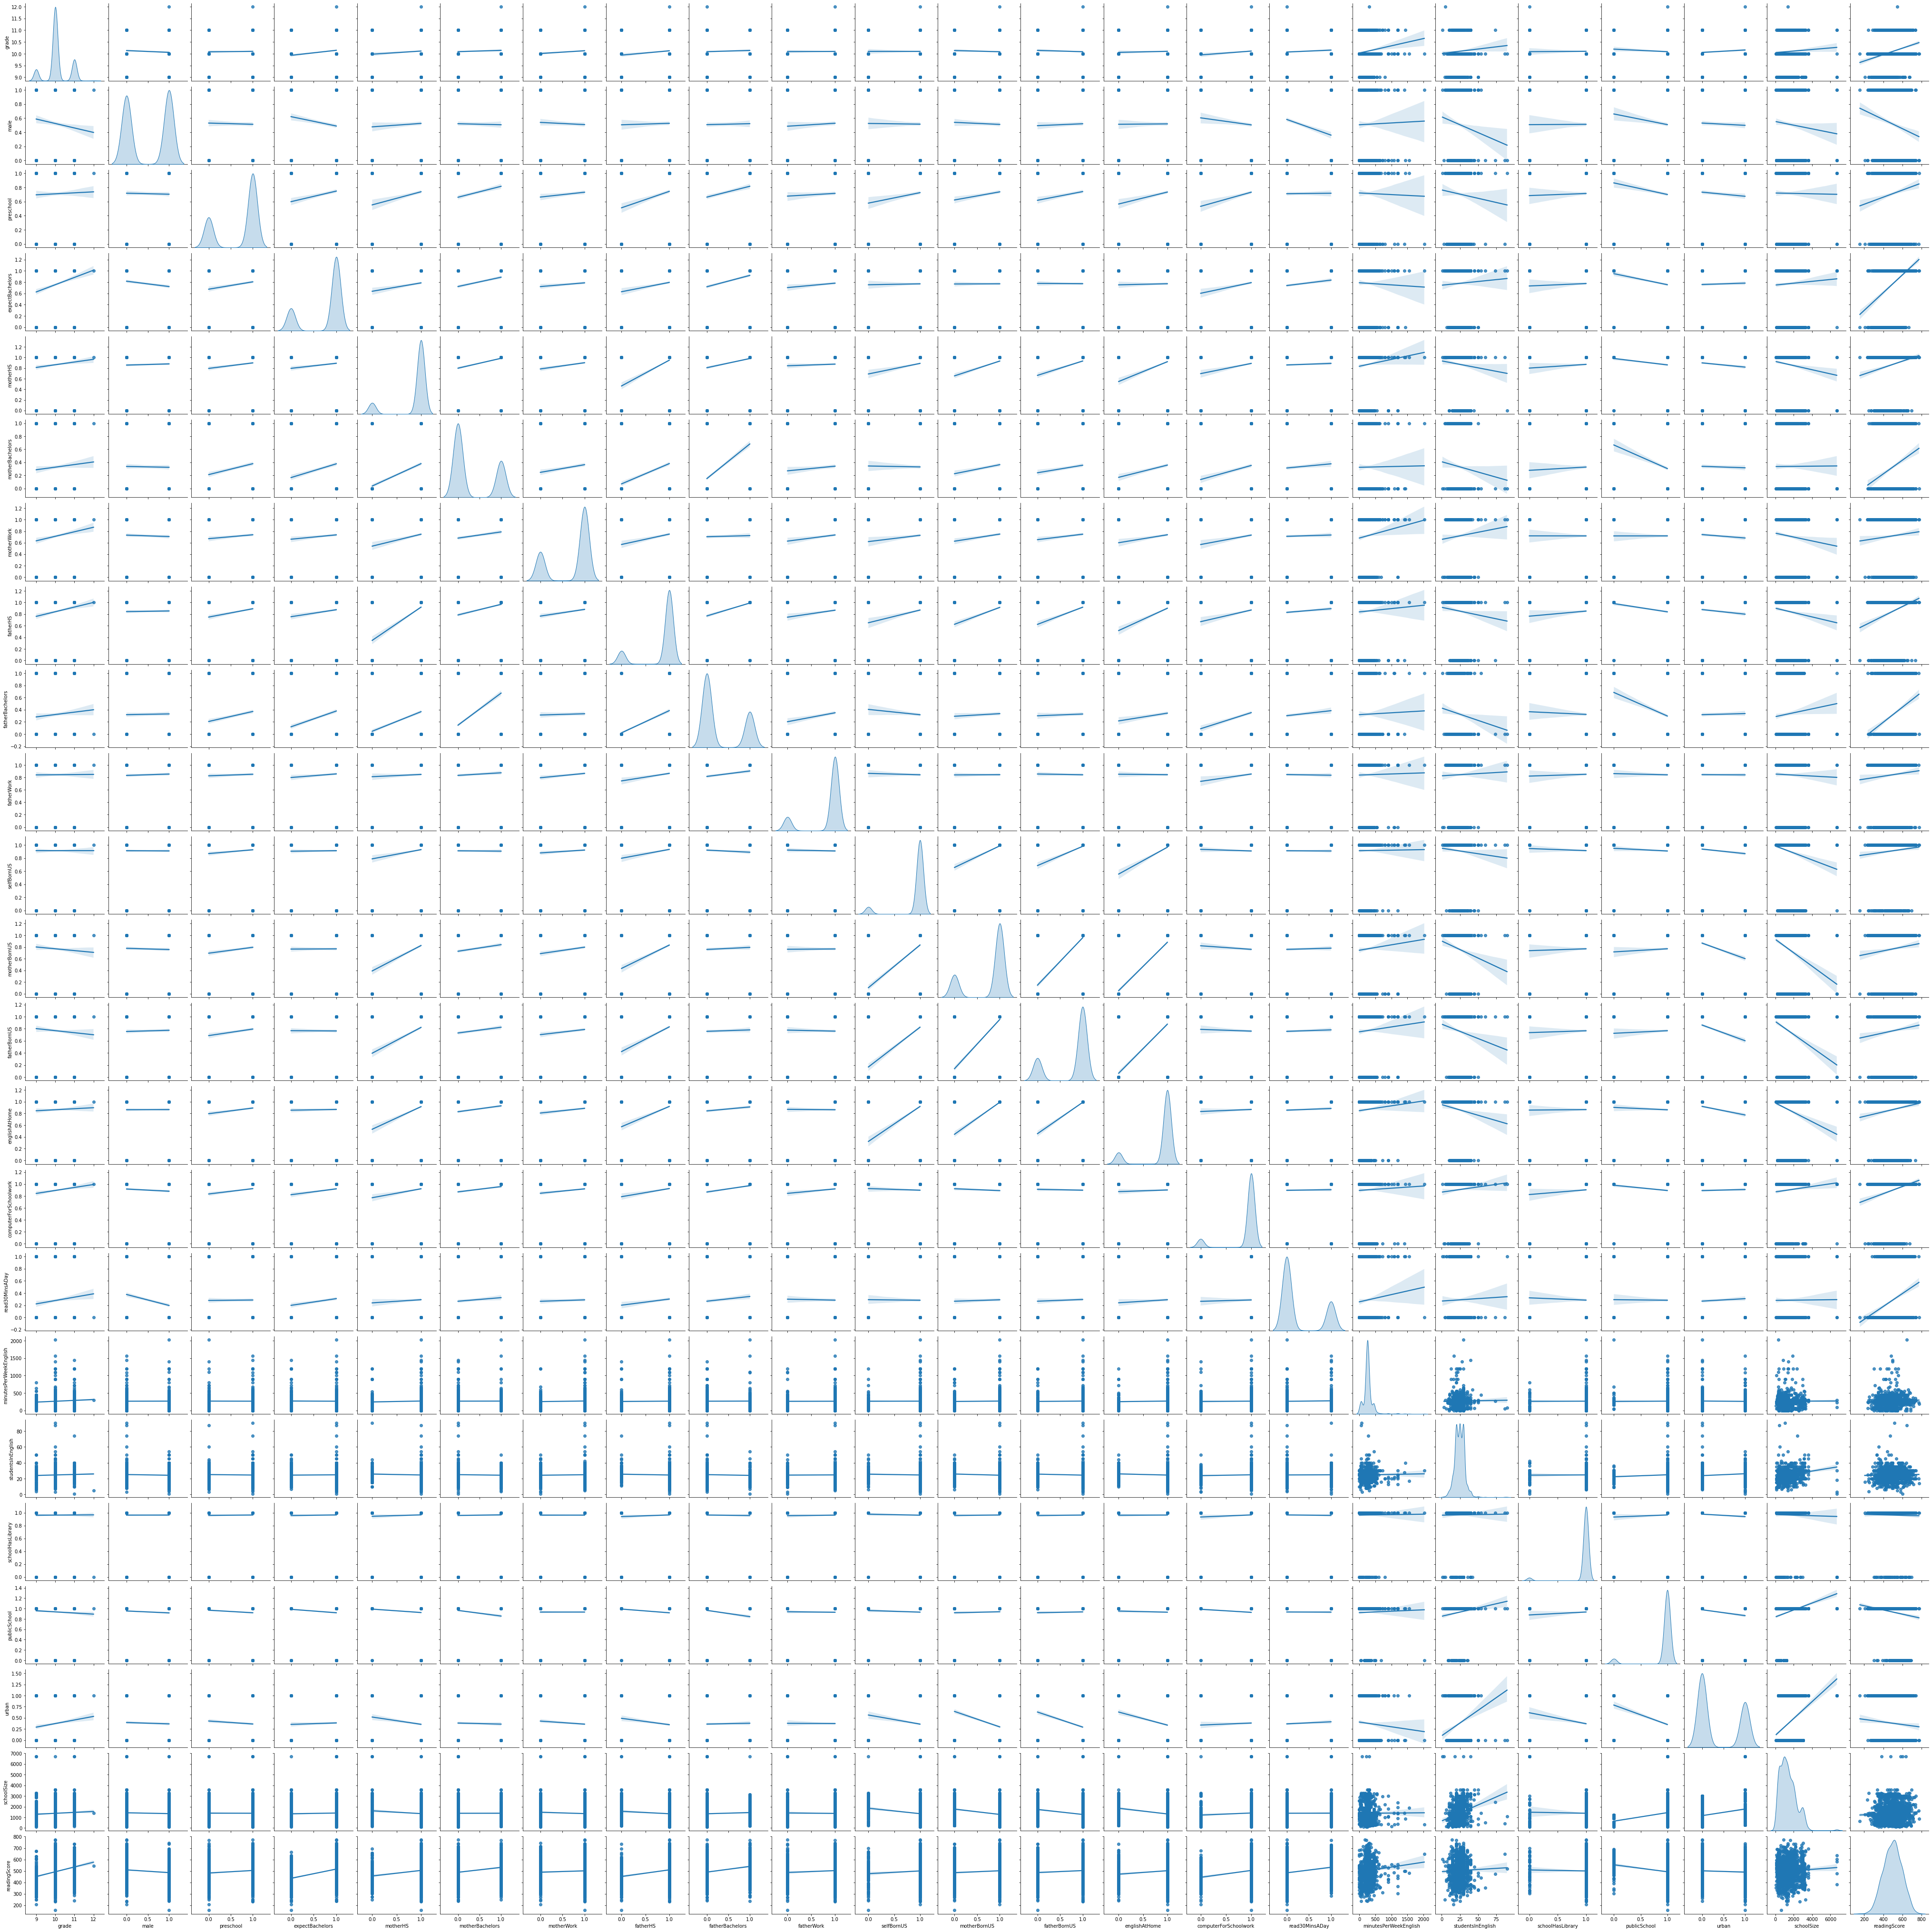

In [12]:
#Verificando a relação entre todas as variáveis usando o pairplot
colunas=df_treino.columns
sns.pairplot(df_treino.loc[:,colunas], diag_kind='kde', kind='reg')


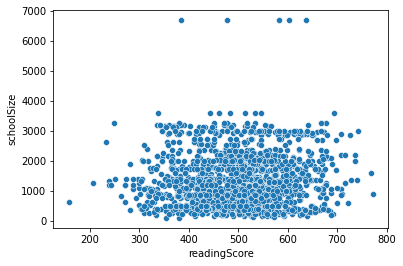

In [13]:
#Analisando a relação entre readingScore e as outras variáveis não categoricas
sns.scatterplot(x=df_treino['readingScore'], y=df_treino['schoolSize'])

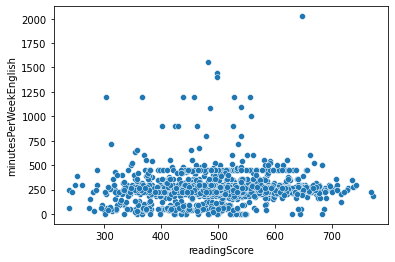

In [14]:
#Analisando a relação entre readingScore e as outras variáveis não categoricas
sns.scatterplot(x=df_treino['readingScore'], y=df_treino['minutesPerWeekEnglish'])

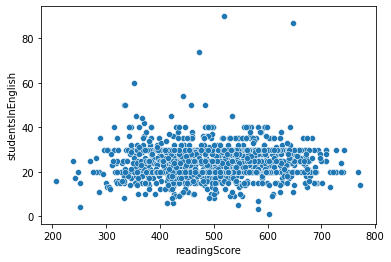

In [15]:
#Analisando a relação entre readingScore e as outras variáveis não categoricas
sns.scatterplot(x=df_treino['readingScore'], y=df_treino['studentsInEnglish'])

In [16]:
#Verificando a correlação entre as variáveis
df_treino.corr()['readingScore'].sort_values(ascending=False)

readingScore             1.000000
expectBachelors          0.357701
fatherBachelors          0.247914
grade                    0.238795
read30MinsADay           0.226628
fatherHS                 0.217771
motherBachelors          0.212449
computerForSchoolwork    0.189879
motherHS                 0.172016
englishAtHome            0.108724
preschool                0.105676
fatherBornUS             0.077266
motherBornUS             0.074418
selfBornUS               0.071042
minutesPerWeekEnglish    0.069621
fatherWork               0.061992
motherWork               0.055505
schoolSize               0.053171
studentsInEnglish        0.028463
schoolHasLibrary        -0.018117
urban                   -0.057206
male                    -0.125125
publicSchool            -0.157543
Name: readingScore, dtype: float64

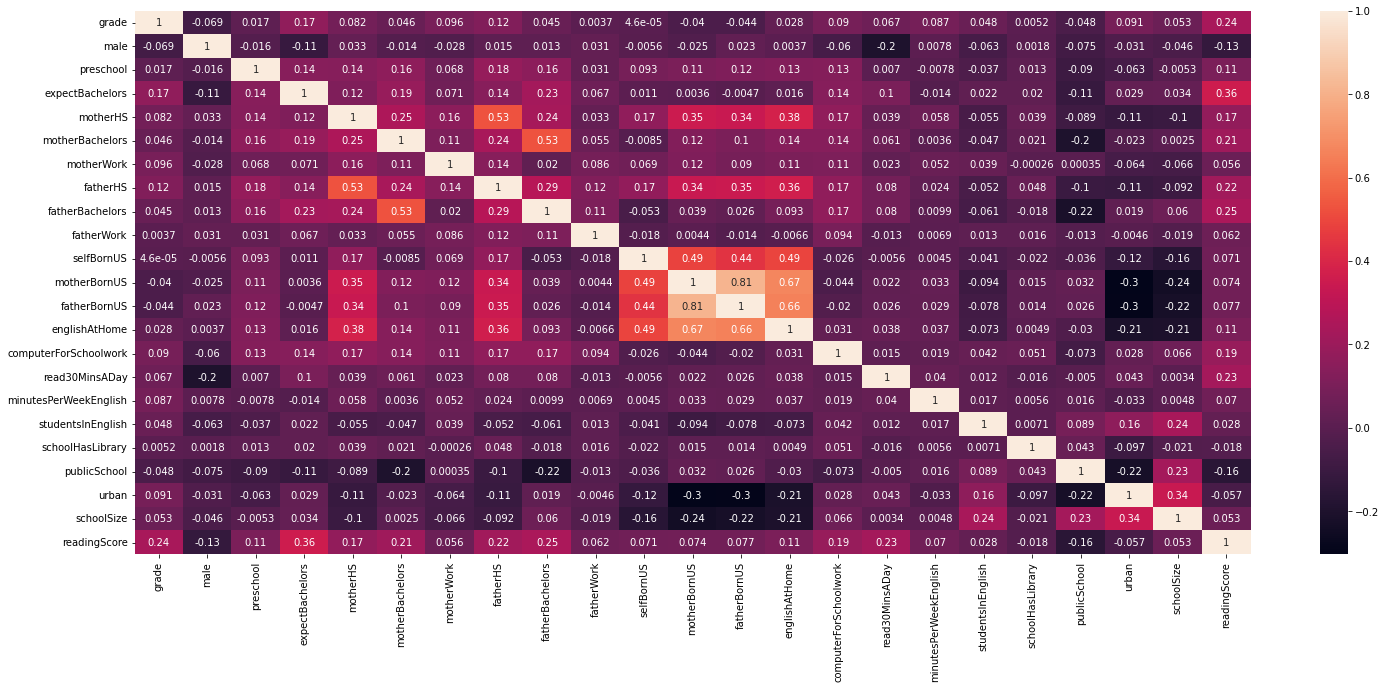

In [17]:
# matriz de correlação
plt.figure(figsize=(25,10))
sns.heatmap(df_treino.corr(), annot=True)
plt.show()

In [18]:
#Pelas análises do scatterplot, correlação e heatmap não há correlação forte entre as variáveis não categóricas e readingScore

# Criação do modelo

In [19]:
#sepearando as variáveis de treino e teste
x_treino=df_treino.drop('readingScore',axis=1)
y_treino=df_treino['readingScore']

x_teste=df_teste.drop('readingScore',axis=1)
y_teste=df_teste['readingScore']

In [20]:
#preenchendo os missing values com a média das variáveis schoolsize, readingscore, minutesperweekenglish para o df de treino

med_treino=df_treino[['minutesPerWeekEnglish','schoolSize', 'readingScore']].mean()
med_teste=df_teste[['minutesPerWeekEnglish','schoolSize', 'readingScore']].mean()

x_treino_trat=df_treino.loc[:,('minutesPerWeekEnglish','schoolSize', 'readingScore')].fillna(value=med_treino)
x_teste_trat=df_teste.loc[:,('minutesPerWeekEnglish','schoolSize', 'readingScore')].fillna(value=med_teste)

Text(0.5, 1.0, 'schoolSize_after')

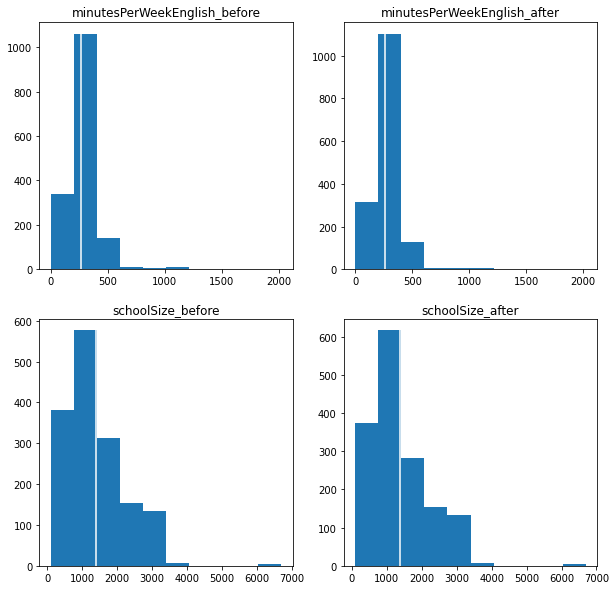

In [36]:
#verificando se houve mudança significativa na distribuiçãodas variáveis

plt.subplots(2,1,figsize=(10,10))


#Primeira linha minutesperweek antes e depois
plt.subplot(2,2,1)
plt.hist(x_treino['minutesPerWeekEnglish'])
plt.axvline(x_treino["minutesPerWeekEnglish"].mean(), color = "w")
plt.title('minutesPerWeekEnglish_before')

plt.subplot(2,2,2)
plt.hist(x_treino_trat['minutesPerWeekEnglish'])
plt.axvline(x_treino["minutesPerWeekEnglish"].mean(), color = "w")
plt.title('minutesPerWeekEnglish_after')

#segunda linha schoolsize antes e depois
plt.subplot(2,2,3)
plt.hist(x_treino['schoolSize'])
plt.axvline(x_treino['schoolSize'].mean(), color = "w")
plt.title('schoolSize_before')

plt.subplot(2,2,4)
plt.hist(x_treino_trat['schoolSize'])
plt.axvline(x_treino['schoolSize'].mean(), color = "w")
plt.title('schoolSize_after')


In [37]:
#criando o modelo de dados separando as variáveis

x_treino.loc[:,("minutesPerWeekEnglish", "studentsInEnglish", "schoolSize")].fillna(value = med_treino, inplace=True)
x_treino.fillna(method = "ffill", inplace=True)
x_treino.fillna(method = "bfill", inplace=True)

x_teste.fillna(method = "ffill", inplace=True)
x_teste.fillna(method = "bfill", inplace=True)

In [38]:
x_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   male                   1570 non-null   int64  
 2   raceeth                1570 non-null   object 
 3   preschool              1570 non-null   float64
 4   expectBachelors        1570 non-null   float64
 5   motherHS               1570 non-null   float64
 6   motherBachelors        1570 non-null   float64
 7   motherWork             1570 non-null   float64
 8   fatherHS               1570 non-null   float64
 9   fatherBachelors        1570 non-null   float64
 10  fatherWork             1570 non-null   float64
 11  selfBornUS             1570 non-null   float64
 12  motherBornUS           1570 non-null   float64
 13  fatherBornUS           1570 non-null   float64
 14  englishAtHome          1570 non-null   float64
 15  comp

In [39]:
#realizando as transformações nas variáveis categóricas
ohe = ("OHE",OneHotEncoder(sparse=False),["raceeth"])
minmax = ('minmax', MinMaxScaler(),["minutesPerWeekEnglish", "studentsInEnglish", "schoolSize"])
transformacoes = ColumnTransformer( [ ohe, minmax ], remainder="passthrough" )

In [40]:
x_treino_t = transformacoes.fit_transform(x_treino)
x_teste_t = transformacoes.transform(x_teste)

In [41]:
#transformar para dataframe para podermos remover as colunas
x_treino_t = pd.DataFrame(x_treino_t, columns=transformacoes.get_feature_names_out())
x_teste_t = pd.DataFrame(x_teste_t, columns=transformacoes.get_feature_names_out())

"""ao converter o array,resultante do ColumnTransform, em dataframe
perdemos o index, por isso vamos resetar o index do y"""

y_treino = y_treino.reset_index()
y_treino= y_treino.drop(columns = "index")

In [42]:
x_treino_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 29 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   OHE__raceeth_American Indian/Alaska Native           1570 non-null   float64
 1   OHE__raceeth_Asian                                   1570 non-null   float64
 2   OHE__raceeth_Black                                   1570 non-null   float64
 3   OHE__raceeth_Hispanic                                1570 non-null   float64
 4   OHE__raceeth_More than one race                      1570 non-null   float64
 5   OHE__raceeth_Native Hawaiian/Other Pacific Islander  1570 non-null   float64
 6   OHE__raceeth_White                                   1570 non-null   float64
 7   minmax__minutesPerWeekEnglish                        1570 non-null   float64
 8   minmax__studentsInEnglish                            1570 non-null  

In [43]:
#criando os modelos de dados

x_treinoc = sm.add_constant(x_treino_t)
model = sm.OLS(y_treino, x_treinoc)
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     26.66
Date:                Mon, 28 Feb 2022   Prob (F-statistic):          1.89e-111
Time:                        22:58:39   Log-Likelihood:                -9080.2
No. Observations:                1570   AIC:                         1.822e+04
Df Residuals:                    1541   BIC:                         1.837e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [45]:
#verificando o modelo nas variáveis de teste

x_testec = sm.add_constant(x_teste_t)
y_teste_p=results.predict(x_testec)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
x_treino_c = sm.add_constant(x_treino_t)
y_treino_p=results.predict(x_treino_c)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
#MSE para as variáveis treino
mse_treino = mean_squared_error(y_treino, y_treino_p)
mse_treino

6181.01393522978

In [48]:
#MAPE para as variáveis treino
np.sqrt(mse_treino)

78.61942466865158

In [49]:
#MSE para as variáveis teste

mse_teste = mean_squared_error(y_teste, y_teste_p)
mse_teste

5923.802584083019

In [50]:
#MAPE para as variáveis teste
np.sqrt(mse_teste)

76.9662431464796

In [ ]:
#Analisando os resultados do MSE e do MAPE para a svariáveis teste e treino, verifica-se que os resultados estão parecidos. 
#Demonstrando assim que o modelo é adequado e 
#Apesar disso, o Coeficiente de deterinação R2 é de 0,32, ou seja, consegue expicar em 32% a variação do modelo



# Avaliando as premissas do modelo




# 1 Linearidade
Variável target pode ser estimada através da combinação linear entre as variáveis de entrada.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


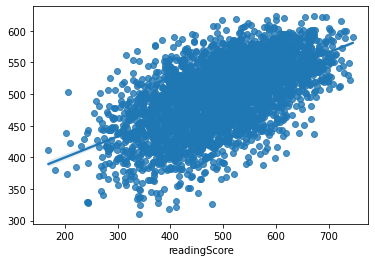

In [51]:
sns.regplot(y_teste, y_teste_p);

In [ ]:
# pelo gráfico anterior não é possível assumir que a variável de saída pode ser estimada através das variáveis de entrada

# 2 - Resíduos( diferença entre a resutado real e o previsto) tem médias iguais a 0

A regressão linear assume que o que não é capturado pelo modelo, os resíduos, tem média 0.

In [52]:
results.resid.mean()

7.798772243705762e-14

In [53]:
#pelo resultado anterior confirma-se que os resíduos estão aproximadamente iguais a 0

# 3 - Sem multicolinariedade (forte)

As variáveis não podem ser fortemente correlacionadas entre si. Em outras palavras, não deve ser possível prever uma variável de entrada a partir de outra.

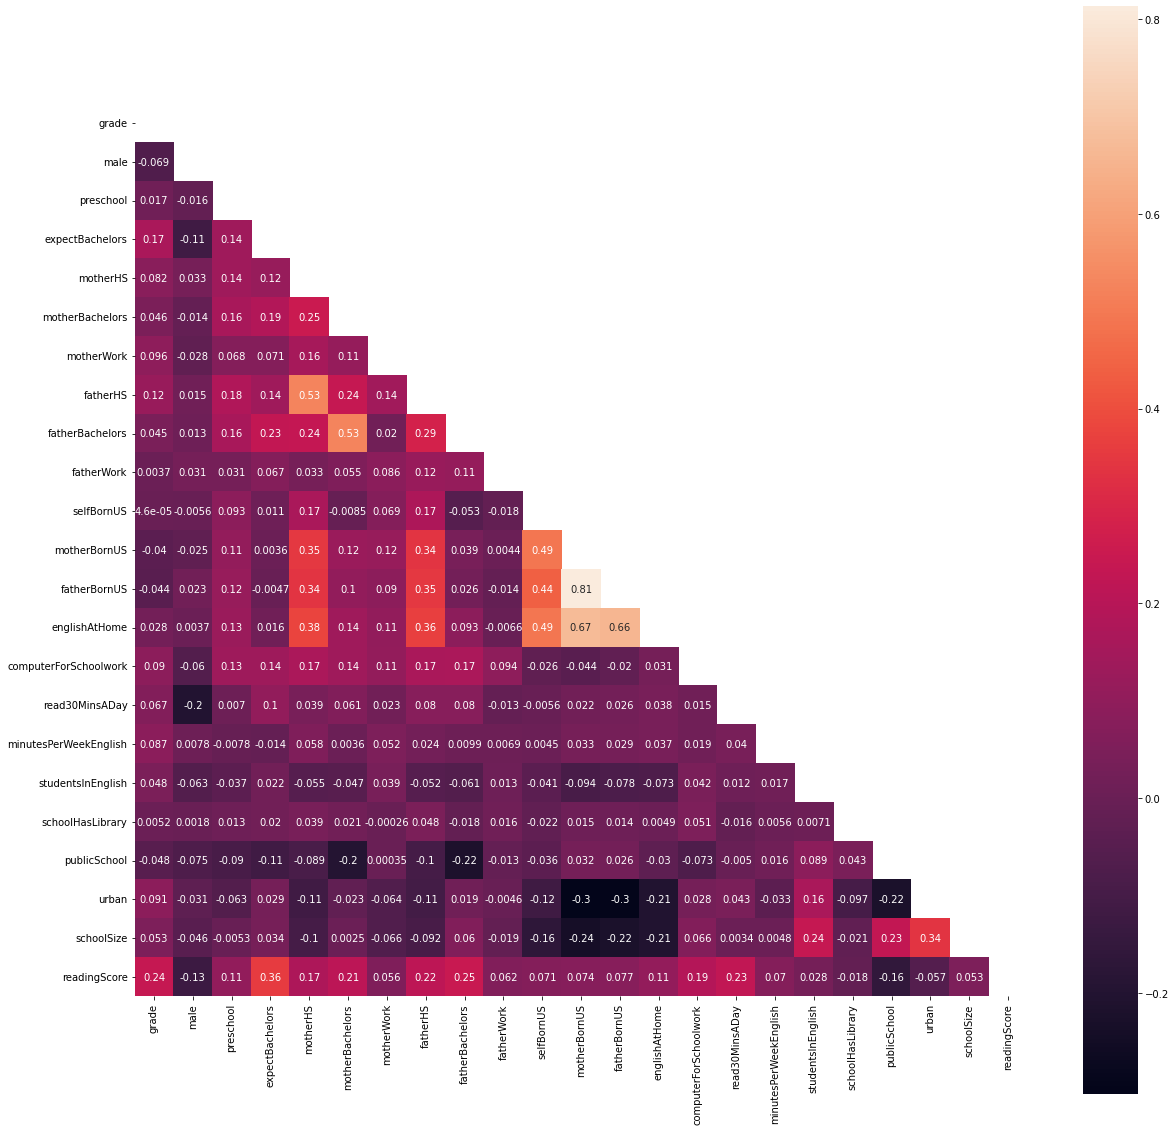

In [54]:
from IPython.core.pylabtools import figsize
plt.subplots(figsize=(20,20))

sns.heatmap(df_treino.corr(),mask = np.triu(df_treino.corr()), annot= True, square = True);

In [ ]:
# pelo heatmap anterior não uma correlação forte entre as variáveis , apenas motherBonus e FatherBonus possuem correlação forte

# 4 - Homecedasticidade dos resíduos


A regressão assume que os resíduos possuem variância igual. Quando a variância dos resíduos não é constante dizemos que possui heteroscedasticidade.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


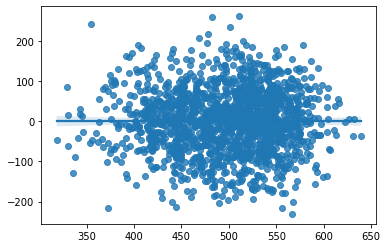

In [55]:
y_pred=results.predict(x_treinoc)
sns.regplot( y_pred, results.resid )

H0  do teste Goldfeld-Quandt assume que os resíduos são homoscedasticos. Como o p-valor foi maior que 0.05, não rejeitamos H0.

In [ ]:
t, p, _ = sms.het_goldfeldquandt(results.resid, x_treinoc)
print(p)

0.7535332895693679


In [56]:
# pelo gráfico e pelo p value do teste Goldfeld verifica-se que os dados são homocedasticos pois a variância dos resíduos é constante

# 5 - Resíduos não podem ser autocorrelacionados

Autocorrelação nos resíduos significa que o resíduo depende de valores anteriores dos resíduos.
Durbin Watson Test
A saída do teste é sempre entre 0 e 4, onde:

Valor igual a 2 significa que não tem autocorrelação nos resíduos.
Valor < 2 indica correlação positiva nos resíduos.
Valor > 2 indica correlação negativa nos resíduos.

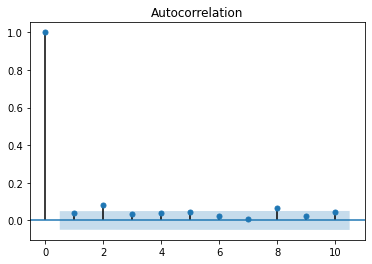

In [57]:
acf = smt.graphics.plot_acf( results.resid, lags=10, alpha=0.05 )
acf.show()

In [ ]:
#pelo gráfico anterior verifica-se que os resíduos são autocorrelacionados

#6 - Resíduos e variáveis não correlacionados

Resíduos correlacionados significa que os resíduos não são componentes totalmente aleatórios.

In [58]:
for column in x_treino_t.columns:
    corr_test = pearsonr( x_treino_t[column], results.resid )
    print( 'Variável: ', column, ' coef ', corr_test[0], 'pvalor', corr_test[1]  )

Variável:  OHE__raceeth_American Indian/Alaska Native  coef  -2.358282026691111e-15 pvalor 0.9999999999985042
Variável:  OHE__raceeth_Asian  coef  1.6081428723391245e-16 pvalor 0.9999999999985713
Variável:  OHE__raceeth_Black  coef  -3.1772544664687707e-16 pvalor 0.999999999998788
Variável:  OHE__raceeth_Hispanic  coef  -1.3788341128584403e-15 pvalor 0.999999999998649
Variável:  OHE__raceeth_More than one race  coef  -1.2793992211143634e-15 pvalor 0.999999999998649
Variável:  OHE__raceeth_Native Hawaiian/Other Pacific Islander  coef  6.583140066060422e-17 pvalor 0.9999999999985713
Variável:  OHE__raceeth_White  coef  2.193612045481297e-15 pvalor 0.9999999999986237
Variável:  minmax__minutesPerWeekEnglish  coef  -3.7296554733501353e-16 pvalor 0.999999999998788
Variável:  minmax__studentsInEnglish  coef  8.819984673169579e-17 pvalor 0.9999999999985713
Variável:  minmax__schoolSize  coef  -5.69233245609202e-16 pvalor 0.9999999999985562
Variável:  remainder__grade  coef  1.3608228042680248

In [59]:
#pela ordem de grandeza dos coeficientes das variáveis, verifica-se que as variáveis não são correlacionadas

#7 - Normalidade dos resíduos

Se os resíduos nao fore norais haverá problemas na determinação dos intervalos de confiança e o nível de significância dos coeficientes

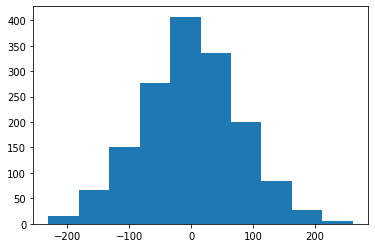

In [60]:
plt.hist(results.resid);

In [61]:
from scipy.stats.morestats import shapiro
shapiro(results.resid)

(0.9990612268447876, 0.6121380925178528)

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     26.66
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          1.89e-111
Time:                        22:35:08   Log-Likelihood:                -9080.2
No. Observations:                1570   AIC:                         1.822e+04
Df Residuals:                    1541   BIC:                         1.837e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [ ]:
#pelo histograa anterior, p-value e o resultado de Omnibus do summary. Verifica-se que os respiduos possuem distribuição normal

# Conclusão

Apesar de possuir um coeficiente de determinação de 0,32 o modelo possui os os resultados de MSE e MAPE não discrepantes entre as variáveis de treino e teste.
Além disso, percebe-se que o modelo atende aos 7 prerequistos para a confiabilidade da regressão linear.
Sendo necessário retirar as váriáveis co "P(t)" maior que 0,05, pois estas, são estatisticamente irrelevantes no modelo.
Desta maneira, conclui-se que o modelo é coerente e pode ser aplicado, contudo, é necessário realizar novas modificações para que o mesmo, possa explicar melhor a variação entre as variáveis